In [2]:
import torch
import torch.utils.data as Data
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data.dataloader import DataLoader
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [3]:
import tools 

In [11]:
from sklearn import preprocessing

In [3]:
csv_lkt = np.array([[ 3.60000000e+02,1.10600000e+03,3.00000000e+00],
 [ 1.00000000e+00,-1.20000000e+01,1.00000000e+00],
 [ 1.80506225e+02,3.18386100e+02, 2.00413125e+00],
 [ 1.04219986e+02, 2.71533171e+02 , 8.16405750e-01]])

In [4]:
csv_lkt

array([[ 3.60000000e+02,  1.10600000e+03,  3.00000000e+00],
       [ 1.00000000e+00, -1.20000000e+01,  1.00000000e+00],
       [ 1.80506225e+02,  3.18386100e+02,  2.00413125e+00],
       [ 1.04219986e+02,  2.71533171e+02,  8.16405750e-01]])

In [5]:
# def ReadCSV(csvfile):
#     csv = pd.read_csv(csvfile, header=None)
#     csv = torch.from_numpy(csv.values).unsqueeze(0).permute(0,2,1).float()
#     return csv

In [16]:
def t2n2f(t, filename):
    n = t.squeeze(0).detach().numpy()
    np.savetxt(filename, n)

In [4]:
filepath = r"D:\Codes\keyan\data\corona_discharge\t2.csv"
csv_corona = pd.read_csv(filepath, header=None)
csv_corona = csv_corona.values.astype(float)
print(csv_corona.shape)

(400, 3)


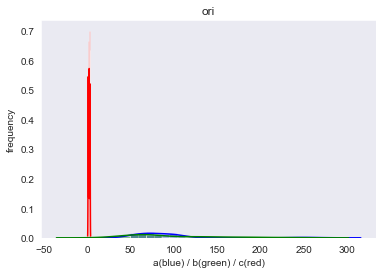

In [6]:
tools.plot3(csv_corona, 'ori')

In [8]:
csv_mmms = tools.MaxMinMeanStd(csv_corona)
csv_mmms

array([[277.        , 254.        ,   3.        ],
       [ 49.        ,  12.        ,   1.        ],
       [ 87.6625    ,  94.36      ,   1.985     ],
       [ 42.93439179,  52.86712335,   0.80709572]])

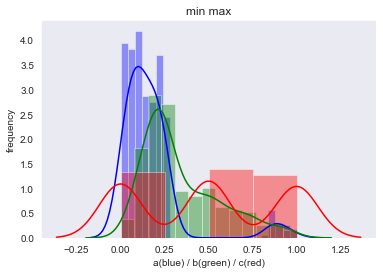

In [10]:
csv_mymmn = tools.MaxMinNormalize(csv_corona, csv_mmms[:2])
tools.plot3(csv_mymmn, 'min max')

In [12]:
csv_skmmn = preprocessing.MinMaxScaler().fit_transform(csv_corona)

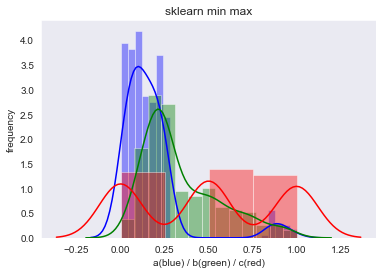

In [13]:
tools.plot3(csv_skmmn, 'sklearn min max')

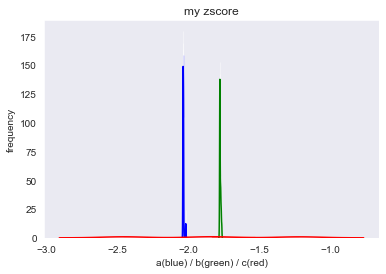

In [23]:
csv_myzsn = tools.ZScoreNormalize(csv_mymmn, csv_mmms[2:4])
tools.plot3(csv_myzsn, 'my zscore')

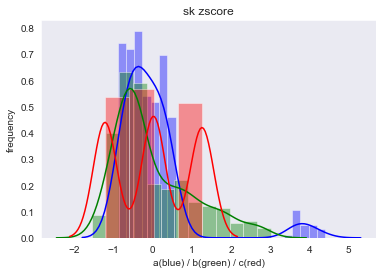

In [25]:
scale = preprocessing.StandardScaler()
scale.fit(csv_skmmn)
scale.scale_ = np.std(csv_skmmn, axis=0, ddof=1)
csv_skzsn = scale.transform(csv_skmmn)
tools.plot3(csv_skzsn, "sk zscore")

In [26]:
csv_mmms_mmn = tools.MaxMinMeanStd(csv_mymmn)
csv_mmms_mmn

array([[1.        , 1.        , 1.        ],
       [0.        , 0.        , 0.        ],
       [0.16957237, 0.34033058, 0.4925    ],
       [0.18830874, 0.21845919, 0.40354786]])

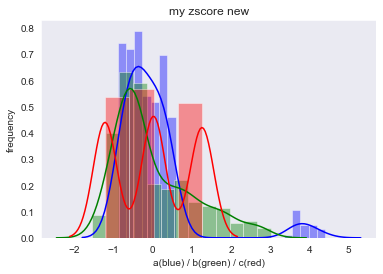

In [27]:
csv_myzsn_ = tools.ZScoreNormalize(csv_mymmn, csv_mmms_mmn[2:4])
tools.plot3(csv_myzsn_, "my zscore new")

In [28]:
pd_data = pd.DataFrame(csv_skzsn)
pd_data

,0,1,2
0,3.548146,-0.025725,-1.220425
1,3.594729,-0.631016,-1.220425
2,3.594729,-0.233794,0.018585
3,3.641312,-0.233794,0.018585
4,3.664603,0.182344,0.018585
...,...,...,...
395,0.473688,-0.593185,0.018585
396,0.473688,-0.649931,1.257596
397,0.473688,-1.122815,0.018585
398,0.496979,-0.839085,1.257596


In [31]:
pd_data.to_csv("sk_zsn.csv", header=0, index=0)

In [12]:
csv_corona = torch.from_numpy(csv_corona).unsqueeze(0).permute(0,2,1)

In [13]:
csv_corona = csv_corona.float()

In [14]:
conv1 = nn.Conv1d(3, 100, 10)
out = F.relu(conv1(csv_corona))
out.shape

torch.Size([1, 100, 391])

In [15]:
pool1 = nn.MaxPool1d(3)
out = pool1(out)

In [16]:
out.shape

torch.Size([1, 100, 130])

In [17]:
conv2 = nn.Conv1d(100, 100, 10)
out = F.relu(conv2(out))
out.shape

torch.Size([1, 100, 121])

In [18]:
pool2 = nn.MaxPool1d(3)
out = pool2(out)
out.shape

torch.Size([1, 100, 40])

In [19]:
conv3 = nn.Conv1d(100, 160, 10)
out = F.relu(conv3(out))
out.shape

torch.Size([1, 160, 31])

In [20]:
pool3 = nn.MaxPool1d(3)
out = pool3(out)
out.shape

torch.Size([1, 160, 10])

In [21]:
conv4 = nn.Conv1d(160, 160, 10)
out = F.relu(conv4(out))
out.shape

torch.Size([1, 160, 1])

In [22]:
dout = nn.Dropout(p=0.5)
out = dout(out)
out.shape

torch.Size([1, 160, 1])

In [27]:
fc = nn.Linear(160*1, 5)
out = fc(out.view(1, 160*1))
out.shape

torch.Size([1, 5])

In [28]:
out

tensor([[-1.5883,  0.0839, -0.3651,  0.5168, -0.4931]],
       grad_fn=<AddmmBackward>)

In [29]:
smax = nn.Softmax()
out = smax(out)
out.shape

torch.Size([1, 5])

In [30]:
out

tensor([[0.0478, 0.2545, 0.1624, 0.3923, 0.1429]], grad_fn=<SoftmaxBackward>)

In [1]:
from sklearn import preprocessing
import numpy as np
import tools

In [19]:
x = np.random.randint(1,10,size=(3,3) )
y = np.random.randint(1,10,size=(3,3) )

In [20]:
 x=x.astype(float)
 y=y.astype(float)

In [21]:
z = np.concatenate((x, y),axis=0)

In [22]:
ss = preprocessing.MinMaxScaler()
ss.fit(z)

MinMaxScaler()

In [23]:
tools.print_object_attr(ss)

feature_range:(0, 1)
copy:True
n_features_in_:3
n_samples_seen_:6
scale_:[0.2        0.14285714 0.125     ]
min_:[-0.8        -0.28571429 -0.125     ]
data_min_:[4. 2. 1.]
data_max_:[9. 9. 9.]
data_range_:[5. 7. 8.]


In [10]:
ss.n_samples_seen_ = 3

In [24]:
ss.transform(x)

array([[0.        , 0.28571429, 0.125     ],
       [0.6       , 0.        , 0.125     ],
       [0.        , 1.        , 0.625     ]])

In [25]:
ss.transform(y)

array([[1.        , 1.        , 0.        ],
       [0.6       , 0.85714286, 0.75      ],
       [1.        , 1.        , 1.        ]])

In [31]:
z_mmms = tools.MaxMinMeanStd(z)

In [32]:
tools.MaxMinNormalize(x.astype(float), z_mmms[:2])

array([[0.        , 0.28571429, 0.125     ],
       [0.6       , 0.        , 0.125     ],
       [0.        , 1.        , 0.625     ]])

In [33]:
tools.MaxMinNormalize(y.astype(float), z_mmms[:2])

array([[1.        , 1.        , 0.        ],
       [0.6       , 0.85714286, 0.75      ],
       [1.        , 1.        , 1.        ]])

In [29]:
tt = preprocessing.StandardScaler()
tt.fit(z)
tt.scale_ = np.std(z, axis=0, ddof=1)

In [30]:
tt.transform(x)

array([[-1.18469776, -0.92577434, -0.7642723 ],
       [ 0.14808722, -1.57926211, -0.7642723 ],
       [-1.18469776,  0.70794508,  0.45856338]])

In [34]:
tools.ZScoreNormalize(x, z_mmms[2:4])

array([[-1.18469776, -0.92577434, -0.7642723 ],
       [ 0.14808722, -1.57926211, -0.7642723 ],
       [-1.18469776,  0.70794508,  0.45856338]])

In [32]:
import numpy as np
import pandas as pd
import tools

In [33]:
a = np.random.randint(1,10,size=(4,3)).astype(float)
b = np.random.randint(1,10,size=(4,3)).astype(float)
print(a)
print(b)

[[8. 5. 2.]
 [2. 1. 4.]
 [3. 7. 7.]
 [5. 4. 5.]]
[[1. 8. 3.]
 [1. 9. 7.]
 [6. 3. 1.]
 [7. 5. 7.]]


In [34]:
c = np.concatenate((a,b))
c

array([[8., 5., 2.],
       [2., 1., 4.],
       [3., 7., 7.],
       [5., 4., 5.],
       [1., 8., 3.],
       [1., 9., 7.],
       [6., 3., 1.],
       [7., 5., 7.]])

In [35]:
ss = tools.DataPreProcessing(c)

In [36]:
ss.fit_transform()

array([[ 1.40992346, -0.09401268, -1.04582503],
       [-0.77318383, -1.59821555, -0.20916501],
       [-0.40933262,  0.65808875,  1.04582503],
       [ 0.31836981, -0.4700634 ,  0.20916501],
       [-1.13703505,  1.03413947, -0.62749502],
       [-1.13703505,  1.41019019,  1.04582503],
       [ 0.68222103, -0.84611411, -1.46415505],
       [ 1.04607224, -0.09401268,  1.04582503]])

In [37]:
tt = tools.SK_scaler(c)

In [38]:
x = c
for t in tt:
    x = t.transform(x)

In [40]:
x

array([[ 1.40992346, -0.09401268, -1.04582503],
       [-0.77318383, -1.59821555, -0.20916501],
       [-0.40933262,  0.65808875,  1.04582503],
       [ 0.31836981, -0.4700634 ,  0.20916501],
       [-1.13703505,  1.03413947, -0.62749502],
       [-1.13703505,  1.41019019,  1.04582503],
       [ 0.68222103, -0.84611411, -1.46415505],
       [ 1.04607224, -0.09401268,  1.04582503]])

In [41]:
qq = tools.DataPreProcessing(c, MinMax=0, Stand=0, extra_scaler=tt)

In [42]:
qq.fit_transform()

TypeError: 'MinMaxScaler' object is not callable

In [46]:
tt[1].transform()

TypeError: transform() missing 1 required positional argument: 'X'